#ANN

Data Processing

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
#Importing dataset
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
X = dataset.iloc[:,3:13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [63]:
y = dataset.iloc[:,13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [0]:
#Dummy Variables for categorical data
geo = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True) 

In [0]:
X = pd.concat([X,geo,gender],axis=1)


In [0]:
X = X.drop(['Geography','Gender'],axis=1)

In [0]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size= 0.3,random_state=43)

In [0]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Make Artificial Nural Network

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [0]:
classifier = Sequential()

In [71]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

#Second Layer
classifier.add(Dense(units = 6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.20))
#Third Layer
classifier.add(Dense(units = 6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dropout(0.10))
#Output Layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform"))

#Compile the ANN
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

model_history = classifier.fit(X_train,Y_train,validation_split=0.3,batch_size=20,epochs=130)


Train on 4900 samples, validate on 2100 samples
Epoch 1/130
4900/4900 [==============================] - 1s 232us/step - loss: 0.5898 - acc: 0.7680 - val_loss: 0.5192 - val_acc: 0.8019
Epoch 2/130
4900/4900 [==============================] - 0s 84us/step - loss: 0.5240 - acc: 0.7941 - val_loss: 0.4917 - val_acc: 0.8019
Epoch 3/130
4900/4900 [==============================] - 0s 87us/step - loss: 0.5027 - acc: 0.7937 - val_loss: 0.4789 - val_acc: 0.8019
Epoch 4/130
4900/4900 [==============================] - 0s 87us/step - loss: 0.4871 - acc: 0.7939 - val_loss: 0.4682 - val_acc: 0.8019
Epoch 5/130
4900/4900 [==============================] - 0s 89us/step - loss: 0.4772 - acc: 0.7941 - val_loss: 0.4607 - val_acc: 0.8019
Epoch 6/130
4900/4900 [==============================] - 0s 87us/step - loss: 0.4705 - acc: 0.7951 - val_loss: 0.4543 - val_acc: 0.8019
Epoch 7/130
4900/4900 [==============================] - 0s 87us/step - loss: 0.4639 - acc: 0.7951 - val_loss: 0.4499 - val_acc: 0.8038

In [72]:
#model history
print(model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


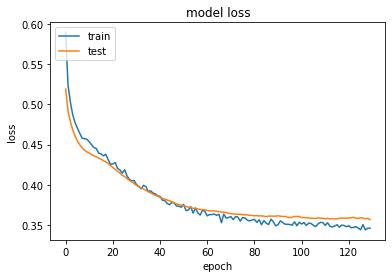

In [73]:
#model performance
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#prediction and evaluating model
y_pred=classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [75]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[2299,   88],
       [ 326,  287]])

In [76]:
#calculating model accuracy
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred,Y_test)
score

0.862